# Lecture 7,8 - Introduction to Machine Learning Paradigms

Machine learning is a vast field that enables computers to learn from data and make predictions or decisions without being explicitly programmed. Broadly, machine learning models can be categorized into three main types based on how they learn from data:

## **1. Supervised Learning**
Supervised learning involves training a model using labeled data, where each input sample is paired with a corresponding output (label). The goal is to learn a mapping function from inputs to outputs so that the model can generalize to unseen data.

- **Examples:** Classification (e.g., spam detection, image recognition), Regression (e.g., predicting house prices).
- **Key Algorithms:** Linear Regression, Decision Trees, Support Vector Machines (SVMs), Neural Networks.

## **2. Unsupervised Learning**
Unsupervised learning deals with unlabeled data, where the model attempts to identify hidden structures or patterns in the data without explicit supervision.

- **Examples:** Clustering (e.g., customer segmentation, anomaly detection), Dimensionality Reduction (e.g., Principal Component Analysis (PCA)).
- **Key Algorithms:** K-Means Clustering, Hierarchical Clustering, Gaussian Mixture Models, Autoencoders.

## **3. Reinforcement Learning**
Reinforcement learning (RL) is a paradigm where an agent learns by interacting with an environment and receiving feedback in the form of rewards or penalties. The agent aims to maximize cumulative rewards over time.

- **Examples:** Game-playing AI (e.g., AlphaGo, Chess engines), Robotics (e.g., self-balancing robots), Autonomous Vehicles.
- **Key Algorithms:** Q-Learning, Deep Q Networks (DQN), Policy Gradient Methods.

Each of these paradigms has unique applications and strengths, and choosing the right approach depends on the problem at hand. In this lecture, we will explore the fundamental concepts, differences, and real-world applications of these learning types.


# Big Example : California Housing Dataset Overview

## **Introduction**
The **California Housing Dataset** is a well-known dataset used for introductory machine learning tasks. It originates from the **1990 U.S. Census** and provides valuable information about different districts in California, making it an excellent dataset for learning regression models.

## **Dataset Characteristics**
This dataset contains data on housing districts in California, with each row representing a district and summarizing its housing and demographic characteristics. The target variable, `median_house_value`, makes it particularly useful for regression tasks, such as predicting house prices based on other district features.

## **Features and Target Variable**
The dataset includes the following columns:

- **`longitude`** – The geographical coordinate of the district (east-west).
- **`latitude`** – The geographical coordinate of the district (north-south).
- **`housing_median_age`** – The median age of the houses in the district.
- **`total_rooms`** – The total number of rooms in all houses of the district.
- **`total_bedrooms`** – The total number of bedrooms in all houses of the district.
- **`population`** – The total population of the district.
- **`households`** – The total number of households in the district.
- **`median_income`** – The median income of households in the district (scaled representation, not actual dollars).
- **`median_house_value`** – The median house price in the district (**Target variable** for regression tasks).
- **`ocean_proximity`** – A categorical feature indicating the district's proximity to the ocean (e.g., "Near Bay", "Inland", etc.).

In the next sections, we will explore how to **load, visualize, preprocess, and build predictive models** using this dataset and decide which one is the best to look at!


In [2]:
import pandas as pd 
file_path = "~/Arman/Teaching/TUMS2025/data/housing.csv"
df = pd.read_csv(file_path)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Visualizing the Dataset**

Before building machine learning models, it is crucial to explore and visualize the dataset to understand relationships between variables. Our first task is to create scatter plots of each feature against the target variable, **`median_house_value`**.

By plotting these relationships, we can:
- Identify potential correlations between features and house prices.
- Detect outliers and unusual patterns.
- Decide whether transformations or feature engineering are necessary.

The following Python code will generate scatter plots for each numerical feature against `median_house_value`.


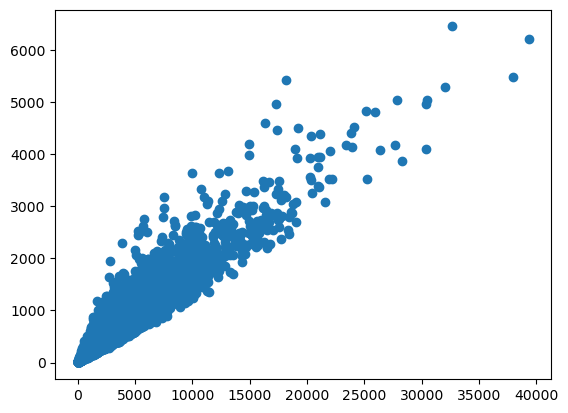

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df["total_rooms"],df["total_bedrooms"])

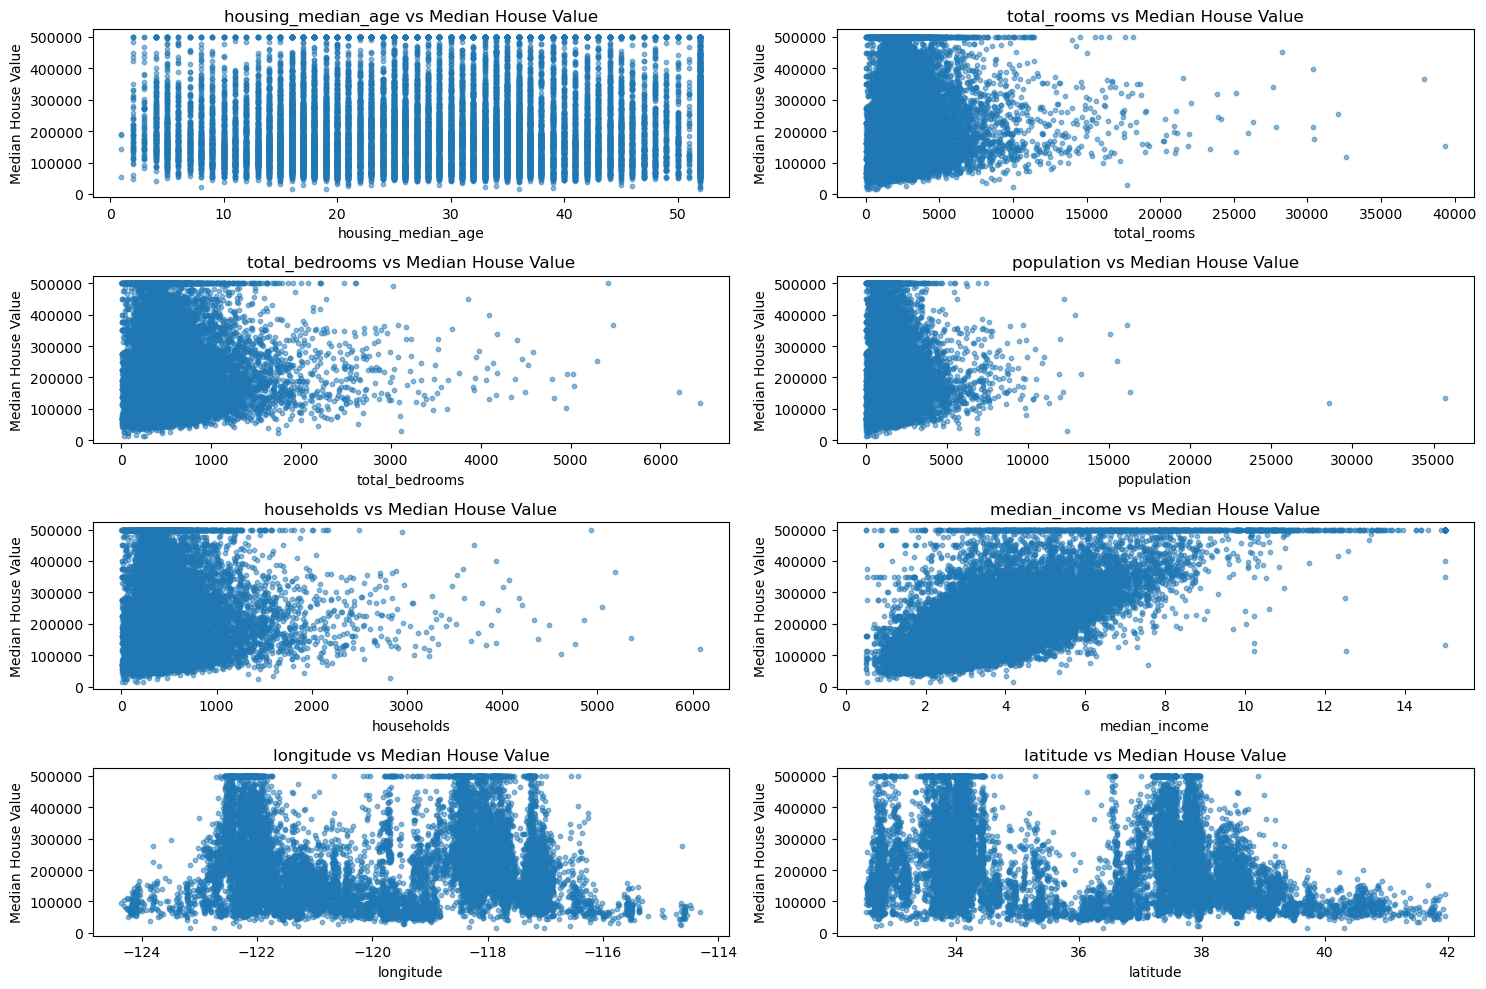

In [3]:
import matplotlib.pyplot as plt
# List of numerical features (excluding median_house_value)
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_income','longitude','latitude']

# Set up the plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    plt.scatter(df[feature], df['median_house_value'], alpha=0.5, s=10)
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.title(f"{feature} vs Median House Value")

plt.tight_layout()
plt.show()

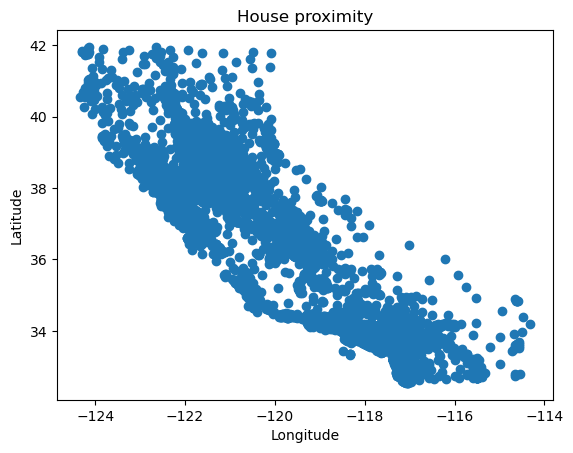

In [4]:
# Let's plot longitude and latitude on a scatter plot 
longitude = df.longitude.to_numpy()
latitude = df.latitude.to_numpy()
plt.scatter(longitude,latitude)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House proximity")
plt.show()

### Nearest Neighbor Clustering for Geographic Data

In our regression model, we aim to convert **numerical longitude and latitude values** into **categorical labels** that can better capture spatial relationships between houses. Instead of treating each point as an independent variable, we apply **nearest neighbor clustering** to group houses that are geographically close into the same category. This helps the model:
- Identify **spatial patterns** in housing data.
- Improve **interpretability** by assigning meaningful location-based labels.
- Reduce noise from minor variations in longitude and latitude.

By varying the number of clusters from **5 to 10**, we explore different levels of granularity in grouping houses, ensuring an optimal balance between **spatial precision** and **generalization** in our regression model.


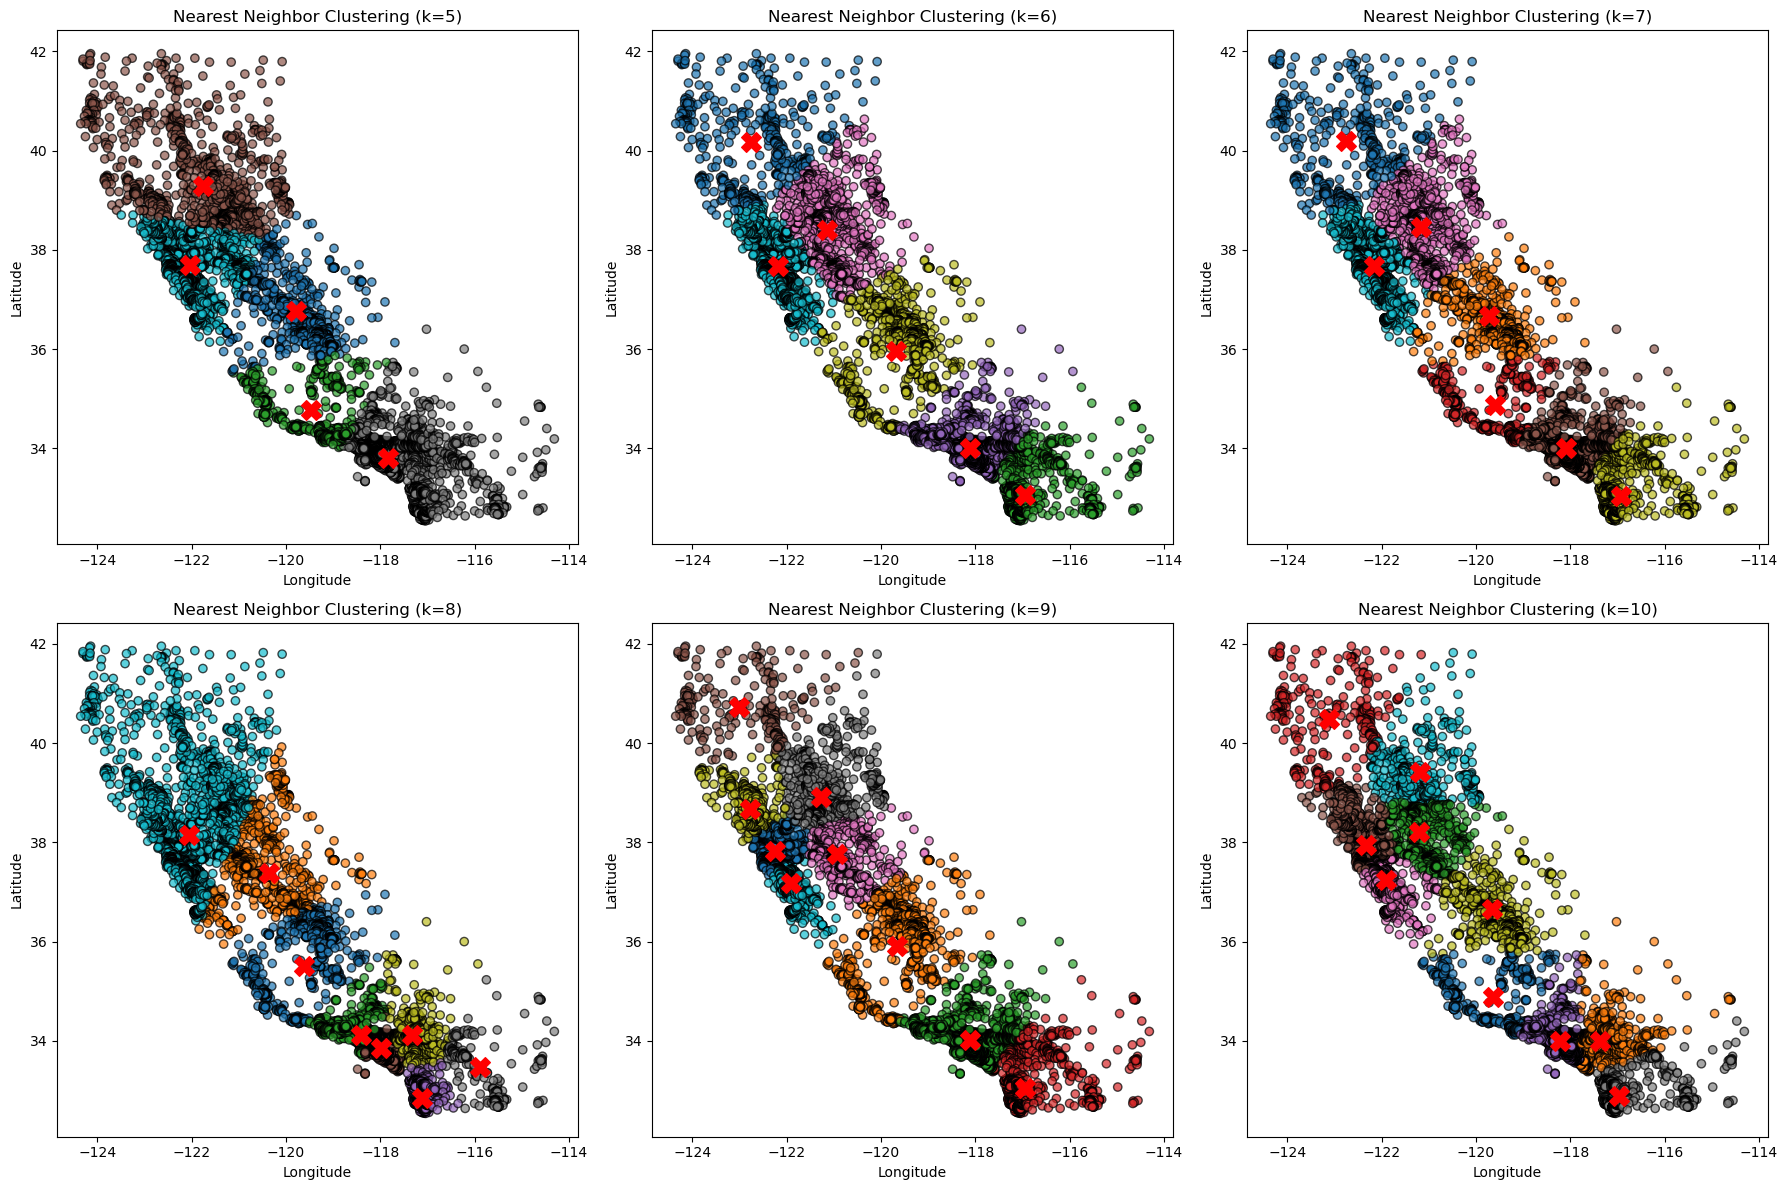

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
longitude = df.longitude.to_numpy()
latitude = df.latitude.to_numpy()

# Combine into a feature matrix
coords = np.column_stack((longitude, latitude))

def euclidean_distance(point1, point2):
    """Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def initialize_centroids(points, k):
    """Randomly select k points as initial cluster centers."""
    indices = np.random.choice(len(points), k, replace=False)
    return points[indices]

def assign_clusters(points, centroids):
    """Assign each point to the nearest centroid."""
    clusters = []
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids] 
        cluster_idx = np.argmin(distances)
        clusters.append(cluster_idx)
    return np.array(clusters)

def update_centroids(points, clusters, k):
    """Update centroid locations as the mean of assigned points."""
    new_centroids = []
    for i in range(k):
        cluster_points = points[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(np.mean(cluster_points, axis=0))
        else:
            new_centroids.append(points[np.random.randint(len(points))])  # Reinitialize if empty
    return np.array(new_centroids)

def nearest_neighbor_clustering(points, k, max_iters=100, tol=1e-4):
    """Perform nearest neighbor clustering from scratch."""
    centroids = initialize_centroids(points, k)
    prev_centroids = centroids.copy()

    for _ in range(max_iters):
        clusters = assign_clusters(points, centroids)
        centroids = update_centroids(points, clusters, k)
        
        # Check for convergence (if centroids do not change significantly)
        if np.all(np.linalg.norm(centroids - prev_centroids, axis=1) < tol):
            break
        prev_centroids = centroids.copy()

    return clusters, centroids

def plot_clusters(points, clusters, centroids, k, ax):
    """Plot clusters and centroids."""
    ax.scatter(points[:, 0], points[:, 1], c=clusters, cmap="tab10", alpha=0.7, edgecolors="k")
    ax.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200)
    ax.set_title(f"Nearest Neighbor Clustering (k={k})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Run clustering for k=5 to k=10 and plot results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, k in enumerate(range(5, 11)):
    clusters, centroids = nearest_neighbor_clustering(coords, k)
    plot_clusters(coords, clusters, centroids, k, axes[i])

plt.tight_layout()
plt.show()


### Data Preprocessing and Regression Modeling for House Price Prediction  

In this section, we process our dataset and train a **Linear Regression model** to predict house prices. The key steps involved are:

1. **Handling Missing Data:**  
   - Any rows containing missing (`NA`) values are removed to ensure data quality.  

2. **Converting Housing Median Age to Categorical Data:**  
   - The `housing_median_age` feature is transformed into categorical bins to better capture its effect on house prices.  

3. **Replacing Longitude and Latitude with Cluster Labels:**  
   - Instead of treating `longitude` and `latitude` as continuous variables, we use **K-Means clustering** to assign each house a categorical region based on geographic proximity. This helps capture location-based trends in house prices.  

4. **Splitting the Dataset:**  
   - The data is divided into **70% training** and **30% testing** to evaluate model performance.  

5. **Building a Machine Learning Pipeline:**  
   - A **Pipeline** is constructed using `sklearn.pipeline`, which ensures efficient preprocessing and model training.  
   - The pipeline includes a `ColumnTransformer` to handle **categorical** (one-hot encoding) and **numerical** (scaling) features appropriately.  

6. **Training a Linear Regression Model:**  
   - A **Linear Regression** model is trained to predict house prices based on the processed features.  

7. **Evaluating Performance:**  
   - The model is assessed using **R² (coefficient of determination)** and **Relative Mean Squared Error (RMSE)** to measure accuracy and predictive performance.  

By following this approach, we integrate **geographic clustering, categorical transformation, and preprocessing automation** into a streamlined predictive modeling pipeline.


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
 

# Step 1: Convert housing_median_age to categorical data
df["housing_median_age_cat"] = pd.cut(
    df["housing_median_age"],
    bins=[0, 10, 20, 30, 40, 50, np.inf],
    labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50+"]
)

# Step 2: Replace longitude and latitude with K-Means cluster labels
df["location_cluster"] = clusters

# Drop original longitude and latitude columns
df = df.drop(columns=["longitude", "latitude"])

# Step 3: Remove rows with NA values
df = df.dropna()

# Step 4: Split data into 70% training and 30% test
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Separate features and target variable
target_column = "median_house_value"  
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# Step 5: Preprocessing Pipeline
# Define categorical and numerical features
categorical_features = ["housing_median_age_cat", "location_cluster"]
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col not in categorical_features]

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
    ("numerical_transformation", StandardScaler(), numerical_features),  # Standardize numerical features
    ("categotical_transformation", OneHotEncoder(), categorical_features)  # One-hot encode categorical features
])

# Build pipeline with preprocessing and Linear Regression model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Step 6: Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(y_test)  # Relative RMSE

print(f"R² Score: {r2:.4f}")
print(f"Relative RMSE: {rmse:.4f}")

R² Score: 0.6366
Relative RMSE: 0.3381


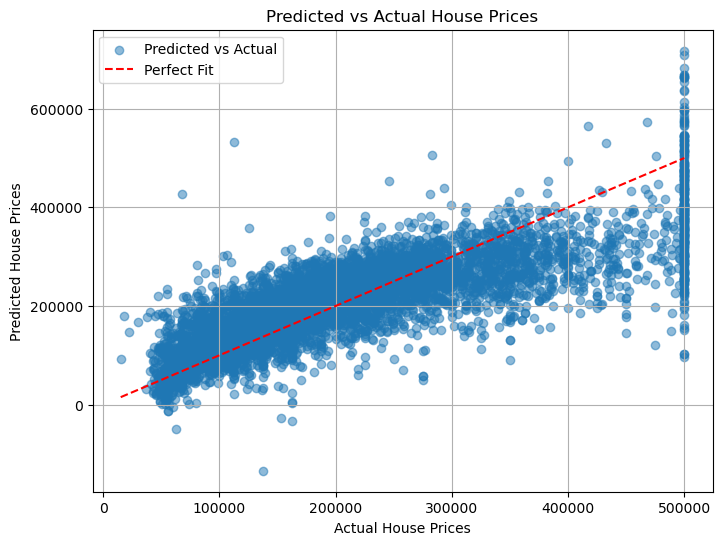

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [7]:
df.to_csv("processed_data.csv")